In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.patches as patches

In [4]:
plt.style.use('seaborn')
color_pal = [x['color'] for x in plt.rcParams['axes.prop_cycle']]
pd.set_option('max_columns', 100)

train = pd.read_csv('/input/nfl-big-data-bowl-2020/train.csv', low_memory=False)

In [75]:
def label_bars(ax, bars, text_format, **kwargs):
    """
    Attaches a label on every bar of a regular or horizontal bar chart
    """
    ys = [bar.get_y() for bar in bars]
    y_is_constant = all(y == ys[0] for y in ys)  # -> regular bar chart, since all all bars start on the same y level (0)

    if y_is_constant:
        _label_bar(ax, bars, text_format, **kwargs)
    else:
        _label_barh(ax, bars, text_format, **kwargs)


def _label_bar(ax, bars, text_format, **kwargs):
    """
    Attach a text label to each bar displaying its y value
    """
    max_y_value = ax.get_ylim()[1]
    inside_distance = max_y_value * 0.05
    outside_distance = max_y_value * 0.01

    for bar in bars:
        text = text_format.format(bar.get_height())
        text_x = bar.get_x() + bar.get_width() / 2

        is_inside = bar.get_height() >= max_y_value * 0.15
        if is_inside:
            color = "white"
            text_y = bar.get_height() - inside_distance
        else:
            color = "black"
            text_y = bar.get_height() + outside_distance

        ax.text(text_x, text_y, text, ha='center', va='bottom', color=color, **kwargs)


def _label_barh(ax, bars, text_format, **kwargs):
    """
    Attach a text label to each bar displaying its y value
    Note: label always outside. otherwise it's too hard to control as numbers can be very long
    """
    max_x_value = ax.get_xlim()[1]
    distance = max_x_value * 0.0025

    for bar in bars:
        text = text_format.format(bar.get_width())

        text_x = bar.get_width() + distance
        text_y = bar.get_y() + bar.get_height() / 2

        ax.text(text_x, text_y, text, va='center', **kwargs)

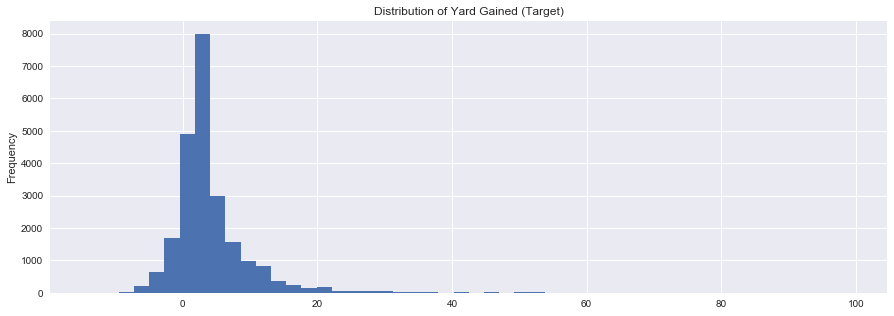

In [5]:
train.groupby('PlayId').first()['Yards'] \
    .plot(kind='hist',
          figsize=(15, 5),
          bins=50,
          title='Distribution of Yard Gained (Target)')
plt.show()

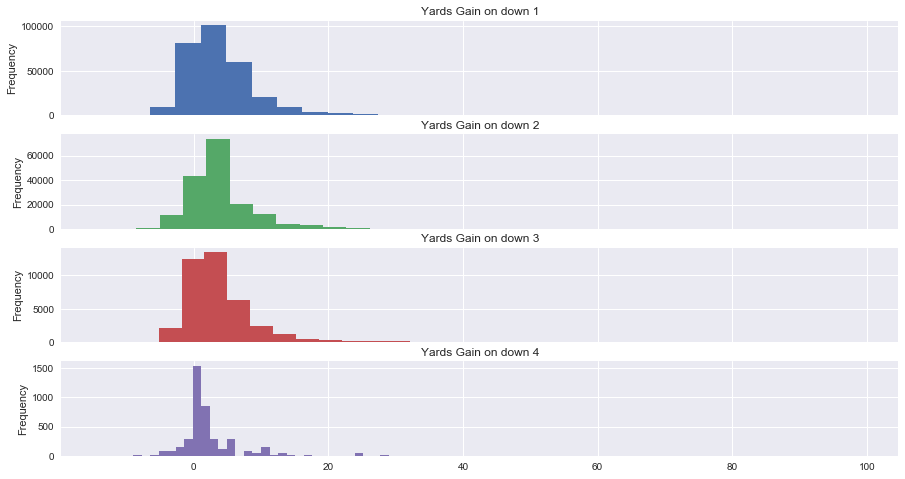

In [6]:
fig, axes = plt.subplots(4, 1, figsize=(15, 8), sharex=True)
n = 0
for i, d in train.groupby('Down'):
    d['Yards'].plot(kind='hist',
                    bins=30,
                    color=color_pal[n],
                    ax=axes[n],
                    title=f'Yards Gain on down {i}')
    n += 1

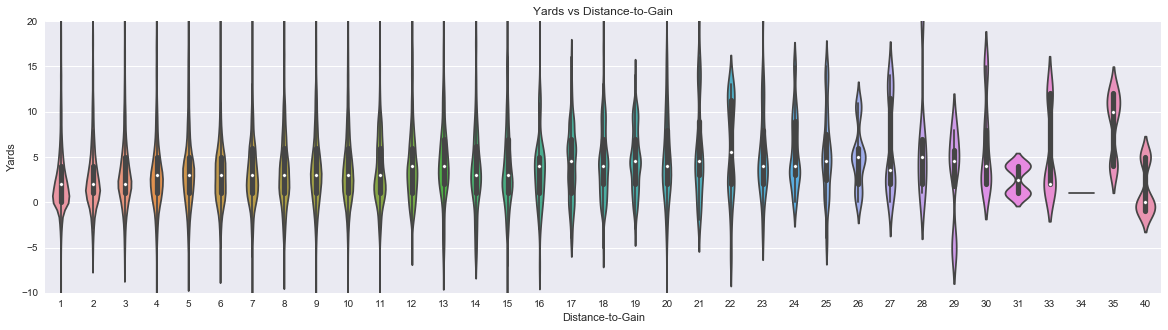

In [7]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.violinplot(x='Distance-to-Gain',
               y='Yards',
               data=train.rename(columns={'Distance': 'Distance-to-Gain'}),
               ax=ax
              )
plt.ylim(-10, 20)
plt.title('Yards vs Distance-to-Gain')
plt.show()

In [8]:
print('Unique game data provided: {}'.format(train['GameId'].nunique()))
print('Unique play data provided: {}'.format(train['PlayId'].nunique()))

Unique game data provided: 512
Unique play data provided: 23171


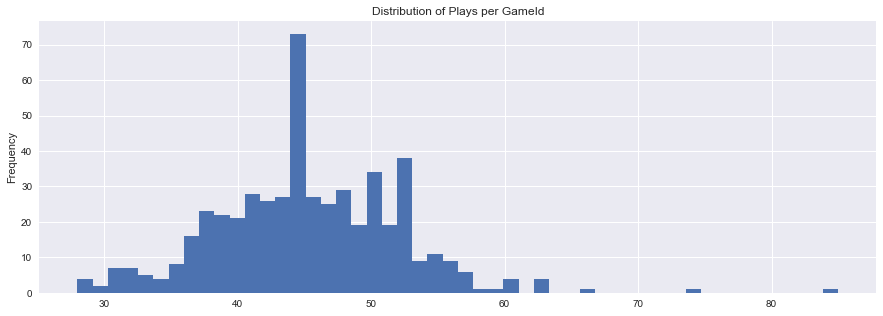

In [9]:
train.groupby('GameId')['PlayId'].nunique() \
    .plot(kind='hist',
          figsize=(15, 5),
          title='Distribution of Plays per GameId',
          bins=50
         )
plt.show()

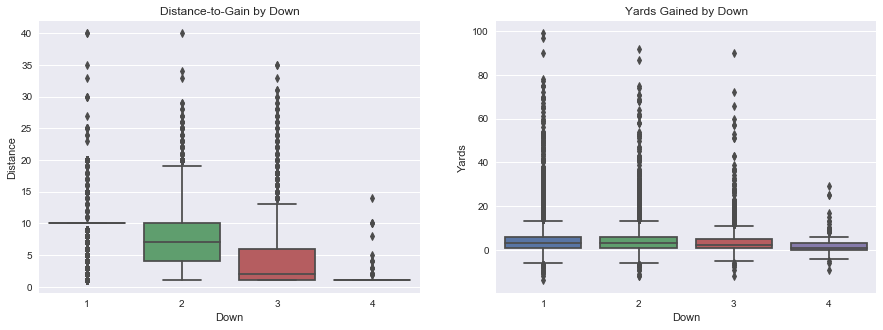

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=train.groupby('PlayId').first()[['Distance', 'Down']],
            x='Down', y='Distance', ax=ax1)
ax1.set_title('Distance-to-Gain by Down')
sns.boxplot(data=train.groupby('PlayId').first()[['Yards', 'Down']],
            x='Down', y='Yards', ax=ax2)
ax2.set_title('Yards Gained by Down')
plt.show()

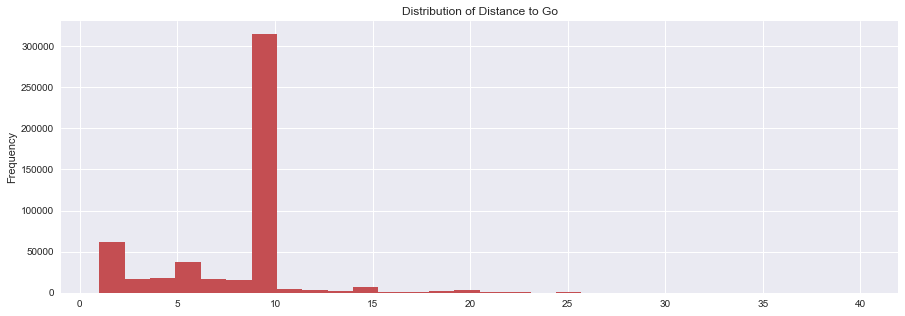

In [11]:
train['Distance'].plot(kind='hist',
                       figsize=(15, 5),
                       title='Distribution of Distance to Go',
                       bins=30,
                       color=color_pal[2])
plt.show()

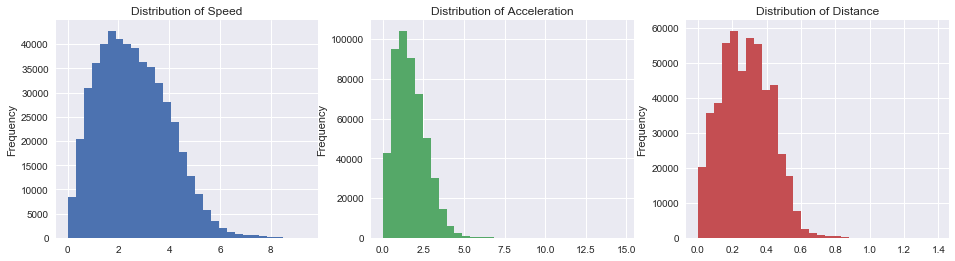

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))
train['S'].plot(kind='hist',
                title='Distribution of Speed',
                bins=30,
                color=color_pal[0],
                ax=ax1)

train['A'].plot(kind='hist',
                title='Distribution of Acceleration',
                bins=30,
                color=color_pal[1],
                ax=ax2)
train['Dis'].plot(kind='hist',
                  title='Distribution of Distance',
                  bins=30,
                  color=color_pal[2],
                  ax=ax3)
plt.show()

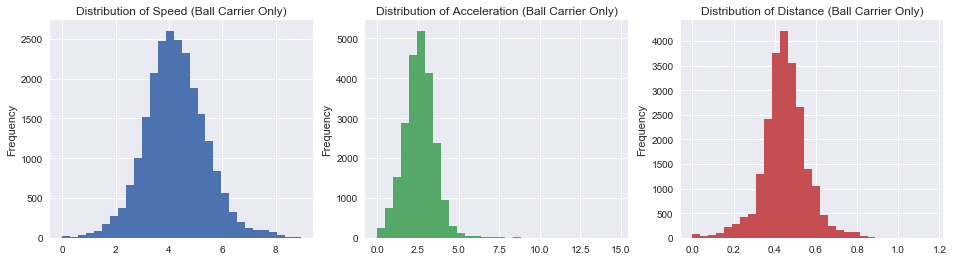

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))
train.query('NflIdRusher == NflId')['S'] \
    .plot(kind='hist',
          title='Distribution of Speed (Ball Carrier Only)',
          bins=30,
          color=color_pal[0],
          ax=ax1)
train.query('NflIdRusher == NflId')['A'] \
    .plot(kind='hist',
          title='Distribution of Acceleration (Ball Carrier Only)',
          bins=30,
          color=color_pal[1],
          ax=ax2)
train.query('NflIdRusher == NflId')['Dis'] \
    .plot(kind='hist',
          title='Distribution of Distance (Ball Carrier Only)',
          bins=30,
          color=color_pal[2],
          ax=ax3)
plt.show()

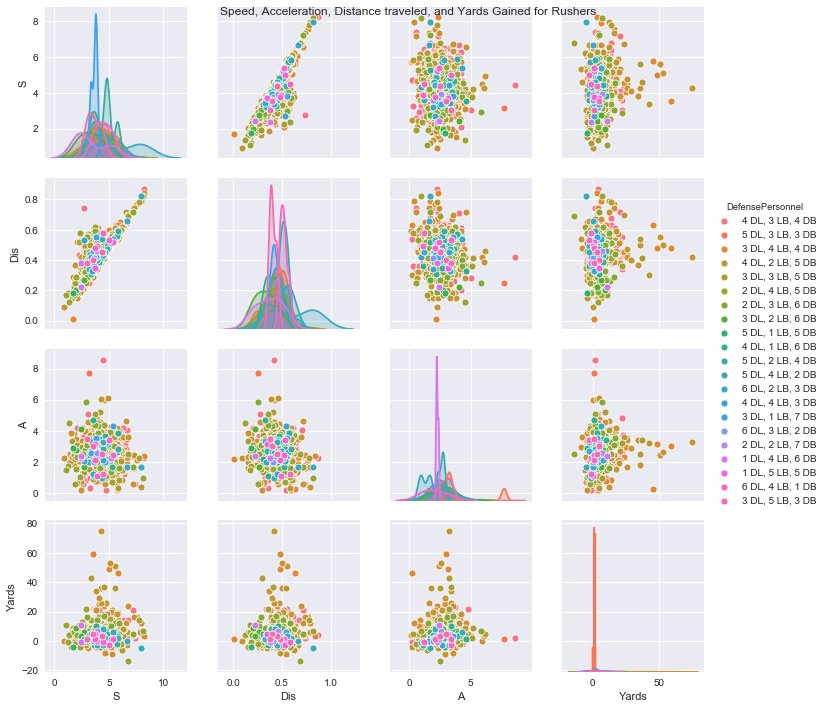

In [14]:
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)
sns.pairplot(train.query('NflIdRusher == NflId')\
             .sample(1000)[['S', 'Dis', 'A', 'Yards', 'DefensePersonnel']],
             hue='DefensePersonnel')
plt.suptitle('Speed, Acceleration, Distance traveled, and Yards Gained for Rushers')
plt.show()

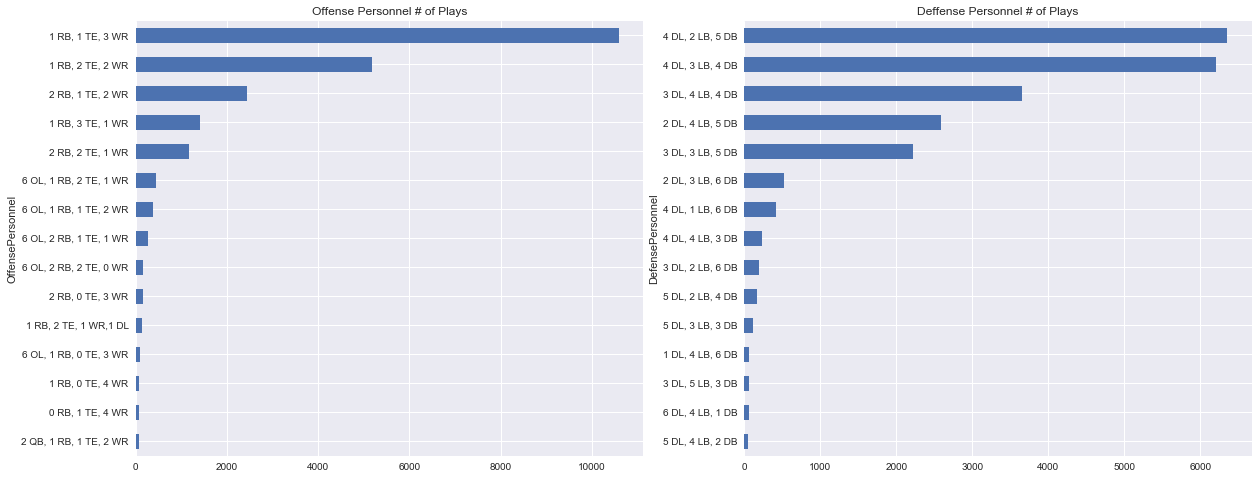

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
train.groupby('PlayId') \
    .first() \
    .groupby('OffensePersonnel') \
    .count()['GameId'] \
    .sort_values() \
    .tail(15) \
    .plot(kind='barh',
          title='Offense Personnel # of Plays',
          ax=ax[0])

train.groupby('PlayId') \
    .first() \
    .groupby('DefensePersonnel') \
    .count()['GameId'] \
    .sort_values() \
    .tail(15) \
    .plot(kind='barh',
          title='Deffense Personnel # of Plays',
          ax=ax[1])
plt.show()

In [16]:
top_10_defenses = train.groupby('DefensePersonnel')['GameId'] \
    .count() \
    .sort_values(ascending=False).index[:10] \
    .tolist()

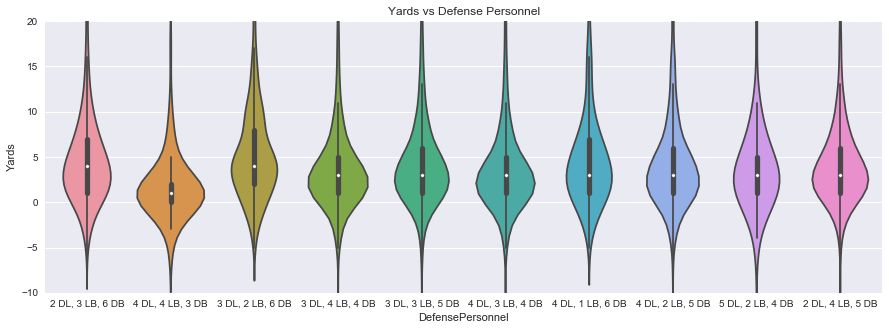

In [17]:
train_play = train.groupby('PlayId').first()
train_top10_df = train_play.loc[train_play['DefensePersonnel'].isin(top_10_defenses)]

fig, ax = plt.subplots(figsize=(15, 5))
sns.violinplot(x='DefensePersonnel',
               y='Yards',
               data=train_top10_df,
               ax=ax)
plt.ylim(-10, 20)
plt.title('Yards vs Defense Personnel')
plt.show()

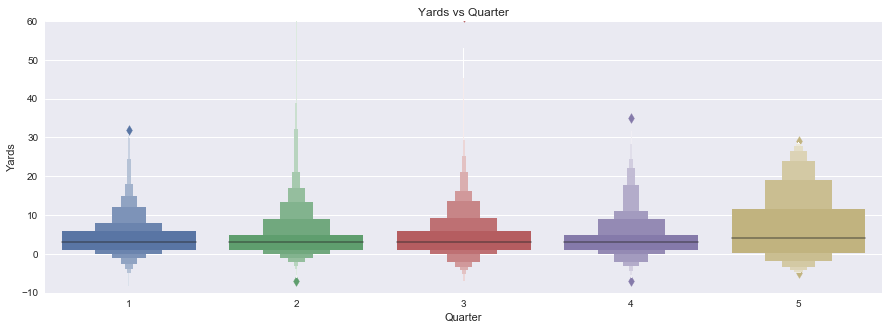

In [18]:
fig, ax =plt.subplots(figsize=(15, 5))
ax.set_ylim(-10, 60)
ax.set_title('Yards vs Quarter')
sns.boxenplot(x='Quarter',
              y='Yards',
              data=train.sample(1000),
              ax=ax)
plt.show()

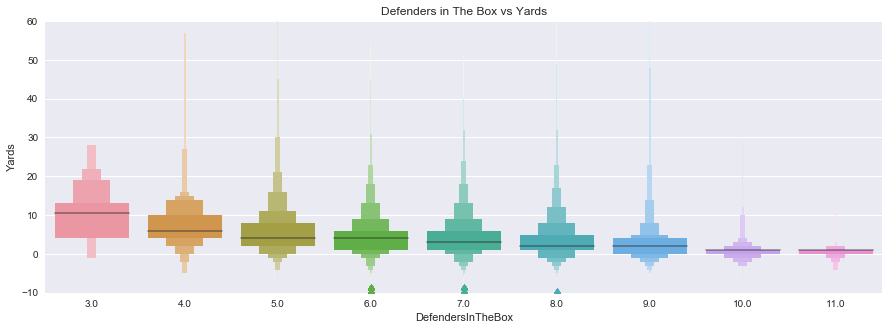

In [22]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_ylim(-10, 60)
ax.set_title('Defenders in The Box vs Yards')
sns.boxenplot(x='DefendersInTheBox',
              y='Yards',
              data=train.query('DefendersInTheBox > 2'),
              ax=ax)
plt.show()

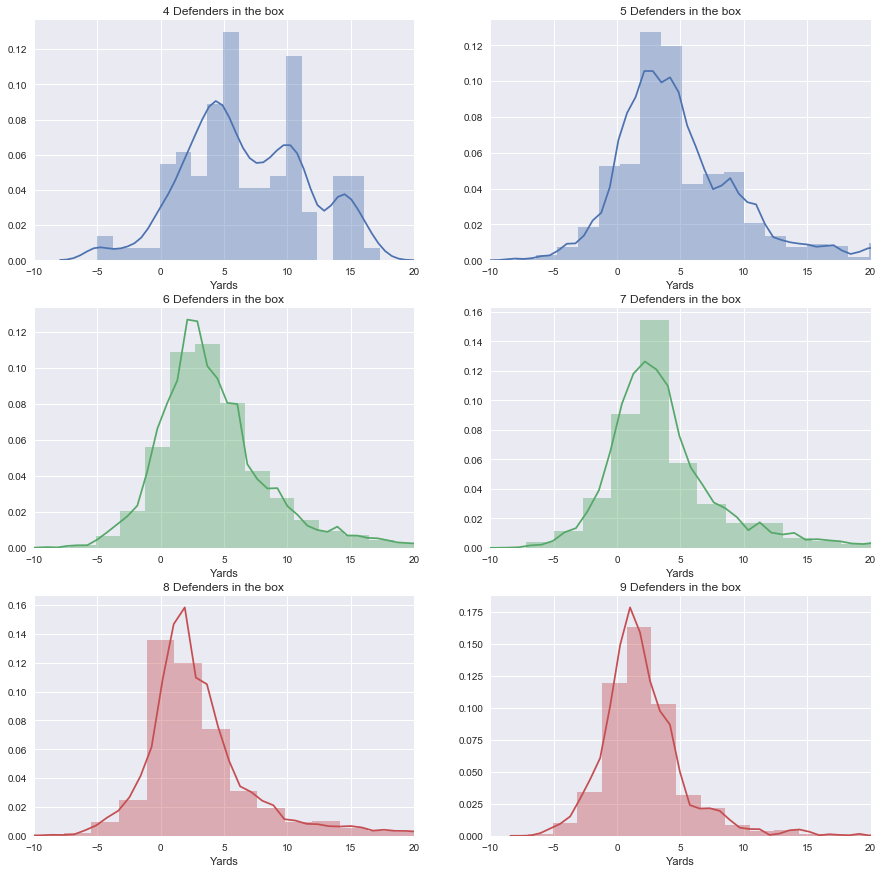

In [34]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
for i in range(4, 10):
    ax_idx = (i//2) - 2
    this_ax = axes[ax_idx, i%2]
    sns.distplot(train.query('DefendersInTheBox == @i')['Yards'],
                 color=color_pal[ax_idx],
                 ax=this_ax)
    this_ax.set_title(f'{i} Defenders in the box')
    this_ax.set_xlim(-10, 20)
plt.show()

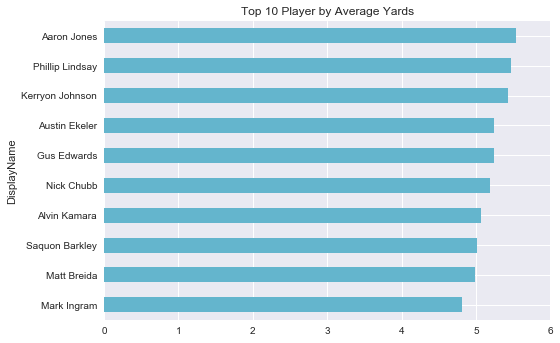

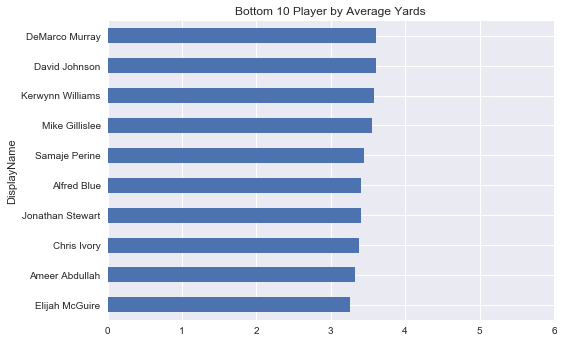

In [55]:
train.query('NflIdRusher == NflId') \
    .groupby('DisplayName')['Yards'] \
    .agg(['count', 'mean']) \
    .query('count > 100') \
    .sort_values('mean', ascending=True) \
    .tail(10)['mean'] \
    .plot(kind='barh',
          title='Top 10 Player by Average Yards',
          color=color_pal[5],
          xlim=(0,6))
plt.show()

train.query('NflIdRusher == NflId') \
    .groupby('DisplayName')['Yards'] \
    .agg(['count', 'mean']) \
    .query('count > 100') \
    .sort_values('mean', ascending=True) \
    .head(10)['mean'] \
    .plot(kind='barh',
          title='Bottom 10 Player by Average Yards',
          color=color_pal[0],
          xlim=(0,6))
plt.show()

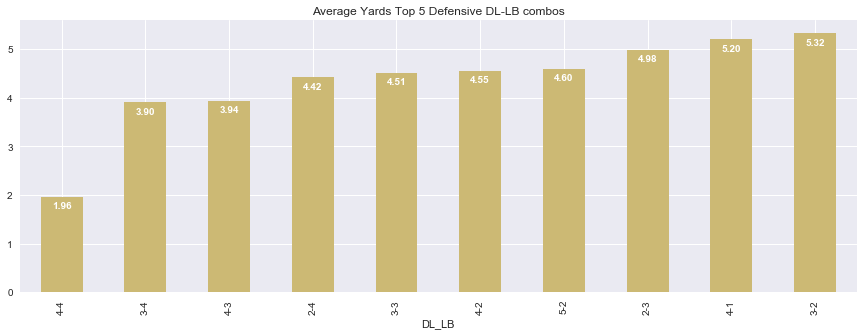

In [77]:
train['DL_LB'] = train['DefensePersonnel'] \
    .str[:10] \
    .str.replace(' DL, ', '-') \
    .str.replace(' LB', '')
ax = train.query('NflIdRusher == NflId') \
    .groupby('DL_LB')['Yards'] \
    .agg(['count', 'mean']) \
    .sort_values('count', ascending=True) \
    .tail(10)['mean'] \
    .sort_values(ascending=True) \
    .plot(kind='bar',
          title='Average Yards Top 5 Defensive DL-LB combos',
          figsize=(15, 5),
          color=color_pal[4]
          )

bars = [p for p in ax.patches]
value_format = "{:0.2f}"
label_bars(ax, bars, value_format, fontweight='bold')
plt.show()